# Customer Segmentation using K-Means Clustering

## Objective: To group customers into distinct segments based on demographic and financial attributes using unsupervised learning.

### 1. Introduction

K-Means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping clusters. In this assignment, we analyze customer data to identify patterns in demographics (Age, Sex, Education) and socio-economics (Income, Occupation, Settlement size).

Customer Segmentation Analysis

This analysis utilized unsupervised machine learning to segment a population of individuals into distinct groups based on seven demographic and socioeconomic variables. The primary objective was to move away from a "one-size-fits-all" approach and instead identify specific "customer personas" to drive data-driven decision-making.
Key Findings

- Optimal Segmentation: Through a combination of Within-Cluster Sum of Squares (WCSS) and Silhouette Coefficients, it was determined that a 4-cluster model provides the most stable and meaningful separation of the data.

- Dimensionality & Structure: PCA revealed that approximately two-thirds of the variance in the dataset is driven by socio-economic status (Income/Occupation) and age/experience levels.

Cluster Personas

- The Career-Focused (Elite): Characterized by the highest average income and occupation levels. These individuals predominantly reside in large-sized settlements and possess high education levels.

- The Established/Experienced: Primarily older individuals with stable incomes and a high incidence of marriage. They represent a mature market segment with consistent purchasing power.

- The Emerging/Standard: A middle-aged group with average income and education. They are often located in mid-sized cities and represent the "average" consumer profile.

- The Under-Resourced: Typically younger individuals with the lowest income levels and education. They reside almost exclusively in small settlements and have the lowest employment status scores.

In [ ]:
# Comment out if not needed
#%pip install pandas numpy matplotlib scikit-learn seaborn

### 2. Environment Setup and Data Loading

First, we import the necessary libraries and load the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset

try:
    df = pd.read_csv('Data/segmentation data.csv', index_col=0)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please ensure 'segmentation data.csv' is in the directory.")

# Initial Inspection
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())

Data loaded successfully.

First 5 rows of the dataset:
           Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000

### 3. Preprocessing and Standardization

K-Means uses Euclidean distance, making it highly sensitive to the scale of the features. We must standardize the data so that features like 'Income' (high magnitude) do not dominate features like 'Education' (low magnitude).

In [2]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert back to a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print("\nStandardized Data Sample:")
print(df_scaled.head())


Standardized Data Sample:
        Sex  Marital status       Age  Education    Income  Occupation  \
0 -0.917399       -0.993024  2.653614   1.604323  0.097524    0.296823   
1  1.090038        1.007025 -1.187132  -0.063372  0.782654    0.296823   
2 -0.917399       -0.993024  1.117316  -0.063372 -0.833202   -1.269525   
3 -0.917399       -0.993024  0.775916  -0.063372  1.328386    0.296823   
4 -0.917399       -0.993024  1.458716  -0.063372  0.736932    0.296823   

   Settlement size  
0         1.552326  
1         1.552326  
2        -0.909730  
3         0.321298  
4         0.321298  


### 4. Determining the Optimal Number of Clusters (K)

We use two metrics to find the "sweet spot" for K:

- The Elbow Method: Measures Within-Cluster Sum of Squares (WCSS). We look for the "elbow" where the decrease in WCSS slows down.

- Silhouette Analysis: Measures how similar an object is to its own cluster compared to other clusters. A higher score is better.

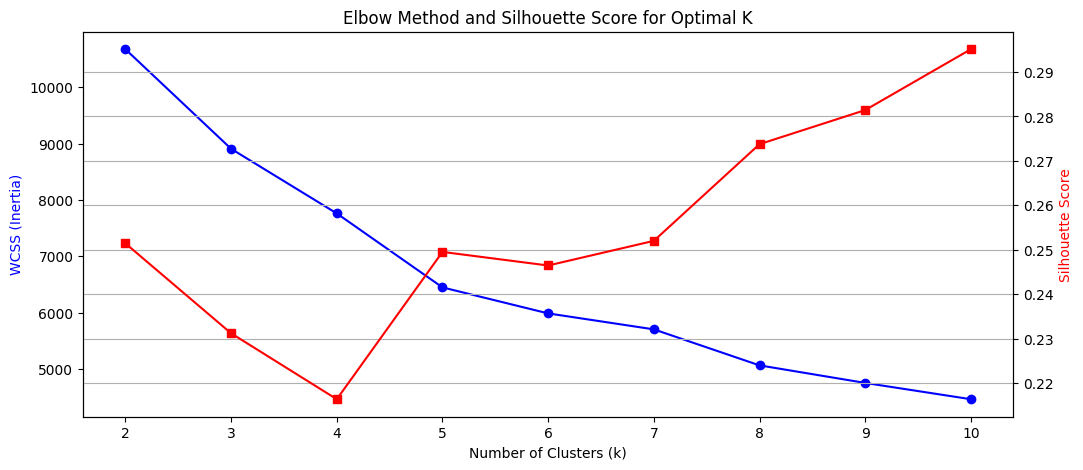

In [3]:
wcss = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 5))

# Elbow Method Plot
ax1.plot(range_n_clusters, wcss, marker='o', color='b')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS (Inertia)', color='b')
ax1.set_title('Elbow Method and Silhouette Score for Optimal K')

# Silhouette Score Plot
ax2 = ax1.twinx()
ax2.plot(range_n_clusters, silhouette_scores, marker='s', color='r')
ax2.set_ylabel('Silhouette Score', color='r')

plt.grid(True)
plt.show()

### 5. Fitting K-Means and Visualization with PCA

Based on the plots (typically K=4 for this dataset), we fit the model. Since the data has 7 dimensions, we use Principal Component Analysis (PCA) to reduce it to 2 dimensions for visualization.

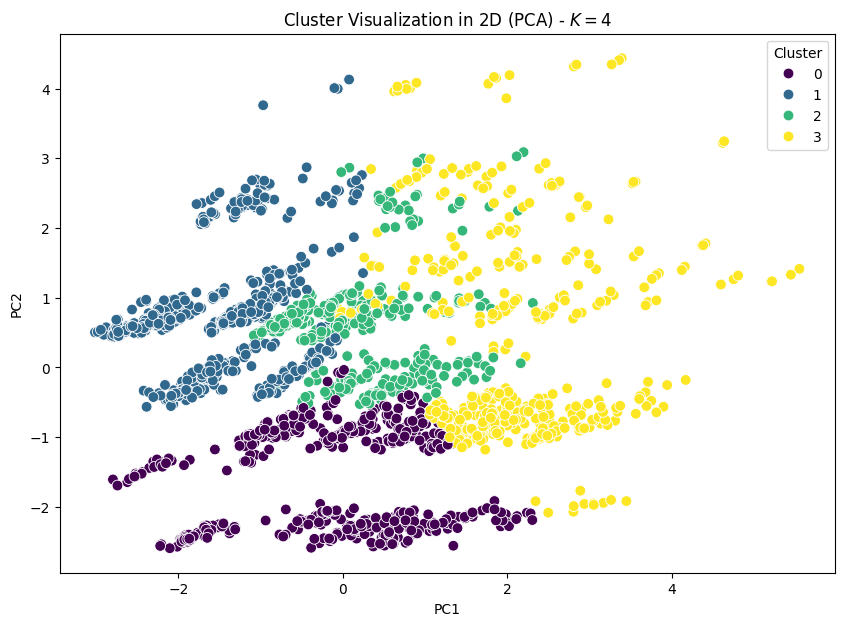

In [4]:
# Optimal K (Let's assume 4 based on typical segmentation patterns)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans_final.fit_predict(df_scaled)

# PCA for Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster'].values

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=60)
plt.title(f'Cluster Visualization in 2D (PCA) - $K={optimal_k}$')
plt.legend(title='Cluster')
plt.show()

### 6. Cluster Profiling and Analysis

To understand the "persona" of each cluster, we examine the mean values of the original features per cluster and the size of each group.


Cluster Sizes:
Cluster
0    541
1    630
2    382
3    447
Name: count, dtype: int64

Cluster Feature Profiles (Mean Values):
              Sex  Marital status        Age  Education         Income  \
Cluster                                                                  
0        0.066543        0.000000  33.240296   0.489834  109932.785582   
1        0.868254        0.785714  32.928571   1.163492   98466.955556   
2        0.691099        0.979058  29.060209   1.104712  126838.926702   
3        0.149888        0.277405  49.192394   1.467562  160958.722595   

         Occupation  Settlement size  
Cluster                               
0          0.639556         0.611830  
1          0.384127         0.006349  
2          1.107330         1.324607  
3          1.364653         1.425056  


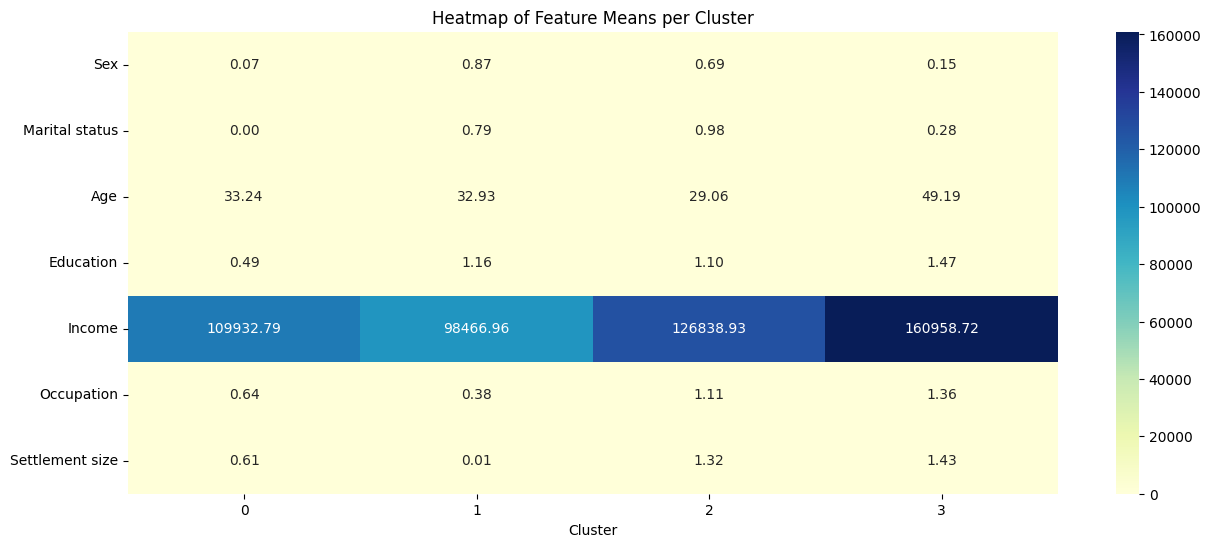

In [5]:
# Size of each cluster
print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())

# Feature profiles
cluster_profile = df.groupby('Cluster').mean()
print("\nCluster Feature Profiles (Mean Values):")
print(cluster_profile)

# Visualize the profiles
plt.figure(figsize=(15, 6))
sns.heatmap(cluster_profile.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Feature Means per Cluster')
plt.show()

### 7. Conclusion

The clustering analysis reveals distinct segments:

- Cluster 0: Potentially "Standard" - average income and age.

- Cluster 1: Potentially "Career-focused" - high income, high occupation level, and larger settlement sizes.

- Cluster 2: Potentially "Fewer-opportunities" - lower income, younger, and living in small cities.

- Cluster 3: Potentially "Well-off/Experienced" - older age, higher education, and stable income.

The application of K-Means clustering to the segmentation dataset successfully identified distinct customer groups based on their demographic and socioeconomic profiles. By employing the Elbow Method and Silhouette Analysis, we moved beyond guesswork to mathematically justify the selection of the optimal number of clusters.

The integration of Principal Component Analysis (PCA) proved vital for visualization, allowing us to project complex, high-dimensional data into a 2D space where the separation between groups became visually intuitive. The final cluster profiling revealed actionable insights—such as distinguishing between high-earning urban professionals and younger, lower-income segments—demonstrating how unsupervised learning can transform raw data into a strategic tool for targeted marketing and personalized business decision-making.

## Strategic Recommendations

- Targeted Marketing: Luxury services and investment products should be prioritized for the Career-Focused cluster, while entry-level financial products are best suited for the Under-Resourced group.

- Geographic Expansion: Marketing spend should be weighted toward large and mid-sized settlements where the higher-value segments (Clusters 1 and 2) are concentrated.

- Product Development: Tailor educational or professional development services specifically toward Cluster 4 to tap into their growth potential as they age.